https://github.com/younggyoseo/ISLR-with-Python/blob/master/Notebooks/Chapter3%20-%20Practice.ipynb
일단 나와 있는 데로 따라합니다.

### data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [0]:
pd.set_option("display.notebook_repr_html", False)
%matplotlib inline
plt.style.use("seaborn-white")

In [0]:
advertising = pd.read_csv("/content/drive/My Drive/ISLR/data/Advertising.csv", usecols = [1,2,3,4])

In [172]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [0]:
credit = pd.read_csv("/content/drive/My Drive/ISLR/data/Credit.csv", usecols = list(range(2,13)))

학생 분류에서 학생이면 1, 아니면 0

In [174]:
credit["Student2"] = credit.Student.map({"No": 0, "Yes": 1})
credit.head(3)

    Income  Limit  Rating  Cards  ...  Married  Ethnicity Balance Student2
0   14.891   3606     283      2  ...      Yes  Caucasian     333        0
1  106.025   6645     483      3  ...      Yes      Asian     903        1
2  104.593   7075     514      4  ...       No      Asian     580        0

[3 rows x 12 columns]

In [175]:
auto = pd.read_csv("/content/drive/My Drive/ISLR/data/Auto.csv", na_values = '?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    392 non-null    int64  
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    int64  
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   year          392 non-null    int64  
 8   origin        392 non-null    int64  
 9   name          392 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 33.7+ KB


### **LR - Simple Linear Regression**

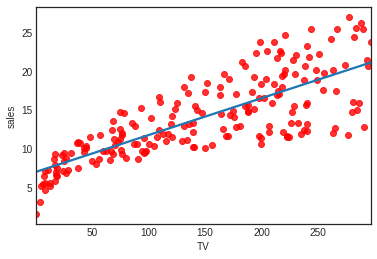

In [176]:
sns.regplot(advertising["TV"], advertising["sales"], order = 1, ci = None, scatter_kws = {"color": 'r'})

두 변수 간의 선형성을 보기 위해서라지만, 와! 언제 봐도 등분산이 파괴된 잔차 플롯 같아!

In [0]:
regr = skl_lm.LinearRegression()
X = scale(advertising.TV, with_mean = True, with_std = False).reshape(-1, 1)
# advertising data를 mean은 유지하고, 퍼짐 정도는 값이 완전 동일하게 가져오지는 않을 것임.
# reshape로 데이터의 범위를 (-1,1)로 제한시킴.
y = advertising.sales

In [178]:
regr.fit(X, y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[0.04753664]


아니 더하고 뺀 값이 왠지 표준오차 같은데 LinearRegression은 summary를 못 하던가?

어쨋든 SVM의 공간 만들기처럼 (신뢰?)공간을 형성합니다.

In [0]:
B0 = np.linspace(regr.intercept_ - 2, regr.intercept_ + 2, 50)
B1 = np.linspace(regr.coef_ - 0.02, regr.coef_ + 0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing = "xy")
# grid라는 건 처음부터 공간에 입력할 데이터를 만들겠다는 뜻
# default인 xy를 값으로 주면 좌표값 데이터라는 뜻이고, 다른 옵션인 ij는 matrix 데이터로 ji로 좌표값을 만들어줌.
Z = np.zeros((B1.size, B0.size))

그냥 contour를 이쁘게 그리고 싶어서 적당히 3시그마보다 큰 값으로 움직인 거였다..

In [0]:
# 신뢰구간인지 확인하고 싶었다.
# import statsmodels.api as sm
# test_regr = sm.OLS(y, sm.add_constant(X)).fit()
# print(test_regr.summary())

In [0]:
for (i,j), v in np.ndenumerate(Z):
  Z[i,j] = ((y - (xx[i,j] + X.ravel()*yy[i,j]))**2).sum()/1000
# TSS/1000

In [182]:
min_RSS = r"$\beta_0$, $\beta_1$, for minimized RSS"
min_rss = np.sum((regr.intercept_ + regr.coef_ *X - y.values.reshape(-1, 1))**2)/1000
# 표준화된 회귀식에 대한 SSE
min_rss

2.1025305831313514

오류가 날까봐 나눠서 하고 싶지만, 3d normal 영향력 그림을 한 번에 볼 수 있다면 포기해야지.

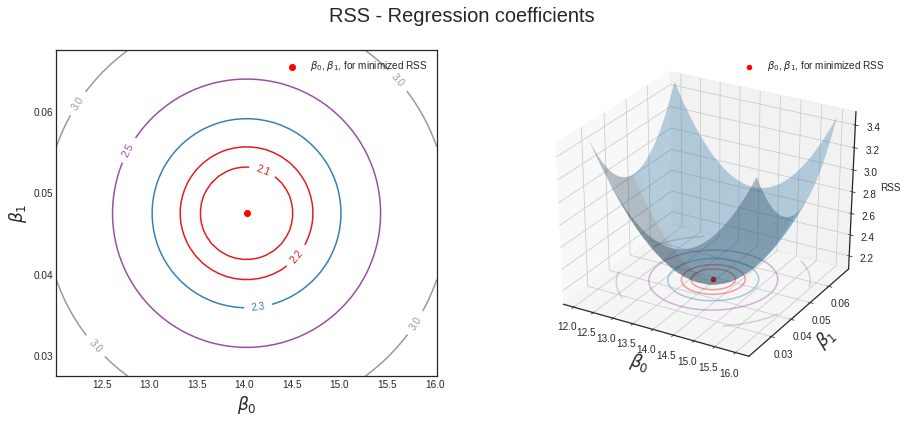

In [183]:
fig = plt.figure(figsize = (15, 6))
fig.suptitle("RSS - Regression coefficients", fontsize = 20)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection = "3d")

# 왼쪽에 contour
CS = ax1.contour(xx, yy, Z, cmap = plt.cm.Set1, levels = [2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c = 'r', label = min_RSS)
ax1.clabel(CS, inline = True, fontsize = 10, fmt = "%1.1f")

# 오른쪽에 3d
ax2.plot_surface(xx, yy, Z, rstride = 3, cstride = 3, alpha = 0.3)
ax2.contour(xx, yy, Z, zdir = 'z', offset = Z.min(), cmap = plt.cm.Set1, alpha = 0.4, levels = [2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c = 'r', label = min_RSS)
ax2.set_zlabel("RSS")
ax2.set_zlim(Z.min(), Z.max())
ax2.set_ylim(0.02, 0.07)

for ax in fig.axes:
  ax.set_xlabel(r"$\beta_0$", fontsize = 17)
  ax.set_ylabel(r"$\beta_1$", fontsize = 17)
  ax.set_yticks([0.03, 0.04, 0.05, 0.06])
  ax.legend()

contour와 contour를 RSS의 크기(회귀의 설명력에 대한 반증)와 함께 나타낸 그림으로 당연하게도 중심점은 회귀계수가 적절히 추정되었음을 이야기하며, 이때 모형의 설명력은 최고(그에 반대인 RSS는 최소)의 값을 갖게 된다.

statsmodels ~

In [184]:
est = smf.ols("sales ~ TV", advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


scikitlearn (scikit - learn) ~

In [0]:
regr = skl_lm.LinearRegression()
X = advertising.TV.values.reshape(-1, 1)
y = advertising.sales

In [186]:
regr.fit(X, y)
print(round(regr.intercept_, 9))
print(regr.coef_)

7.032593549
[0.04753664]


In [187]:
sales_pred = regr.predict(X)
r2_score(y, sales_pred)

0.611875050850071

X로 training 시킨 데이터에 X일 때의 y값을 예측시켰는데 y랑 같은 값이 나올 가능성,

X에 대한 예측이 y를 얼마나 설명할 수 있는지에 대한 측도가

0.6119 정도라니...

### **LR - Multiple Linear Regression**

In [188]:
est = smf.ols("sales ~ radio", advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [189]:
est = smf.ols("sales ~ newspaper", advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [190]:
est = smf.ols("sales ~ TV +  radio + newspaper", advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.58e-96
Time:                        17:26:25   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
advertising.corr()

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

newspaper의 회귀계수가 무의미했던 건 반응변수인 sales보다 radio와의 상관계수 값이 더 커서 그런 것도 같고

> 본격적인 M.L.R. (Multiple Linear Regression)

In [192]:
regr = skl_lm.LinearRegression()

X = advertising[["radio", "TV"]]
y = advertising.sales

regr.fit(X, y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.9210999124051398


In [193]:
advertising[["radio", "TV"]].describe()

            radio          TV
count  200.000000  200.000000
mean    23.264000  147.042500
std     14.846809   85.854236
min      0.000000    0.700000
25%      9.975000   74.375000
50%     22.900000  149.750000
75%     36.525000  218.825000
max     49.600000  296.400000

회귀계수에 대한 신뢰한계 값을 이용해 그려봤다면 이번엔 데이터 값 자체 변동에 대한 한계로 그려보자.

In [0]:
radio = np.arange(0, 50)
TV = np.arange(300)

B1, B2 = np.meshgrid(radio, TV)
Z = np.zeros((TV.size, radio.size))

for (i,j), v in np.ndenumerate(Z):
  Z[i,j] = regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1]

위에는 이용하고자 하는 예측변수의 min, max를 이용해 공간을 만들었을 뿐.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  from ipykernel import kernelapp as app


Text(0.5, 0, 'sales')

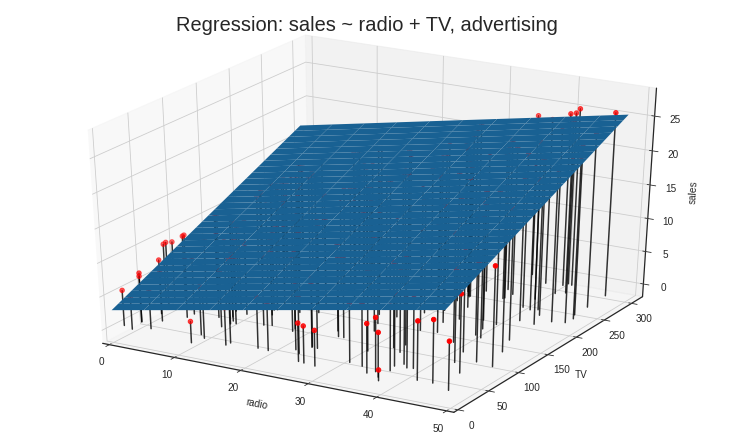

In [195]:
fig = plt.figure(figsize=(10,6))
fig.suptitle("Regression: sales ~ radio + TV, advertising", fontsize = 20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride = 10, cstride = 5, zorder = -1)
for i in np.arange(200):
  ax.plot([advertising.radio[i]]*2, [advertising.TV[i]]*2, [advertising.sales[i], 0], c = 'k', alpha = 0.8, zorder = - 0)
ax.scatter(advertising.radio, advertising.TV, advertising.sales, c = 'r', zorder = 1)
# web programming이었다면 z-index 값을 조절하면 됐겠지만, 일단은 필자가 점을 위에 그릴 방법을 찾지 못했다고 하니.

ax.set_xlabel("radio")
ax.set_xlim(0, 50)
ax.set_ylabel("TV")
ax.set_ylim(ymin = 0)
ax.set_zlabel("sales")

### **Other Consideration in the Regression Model**

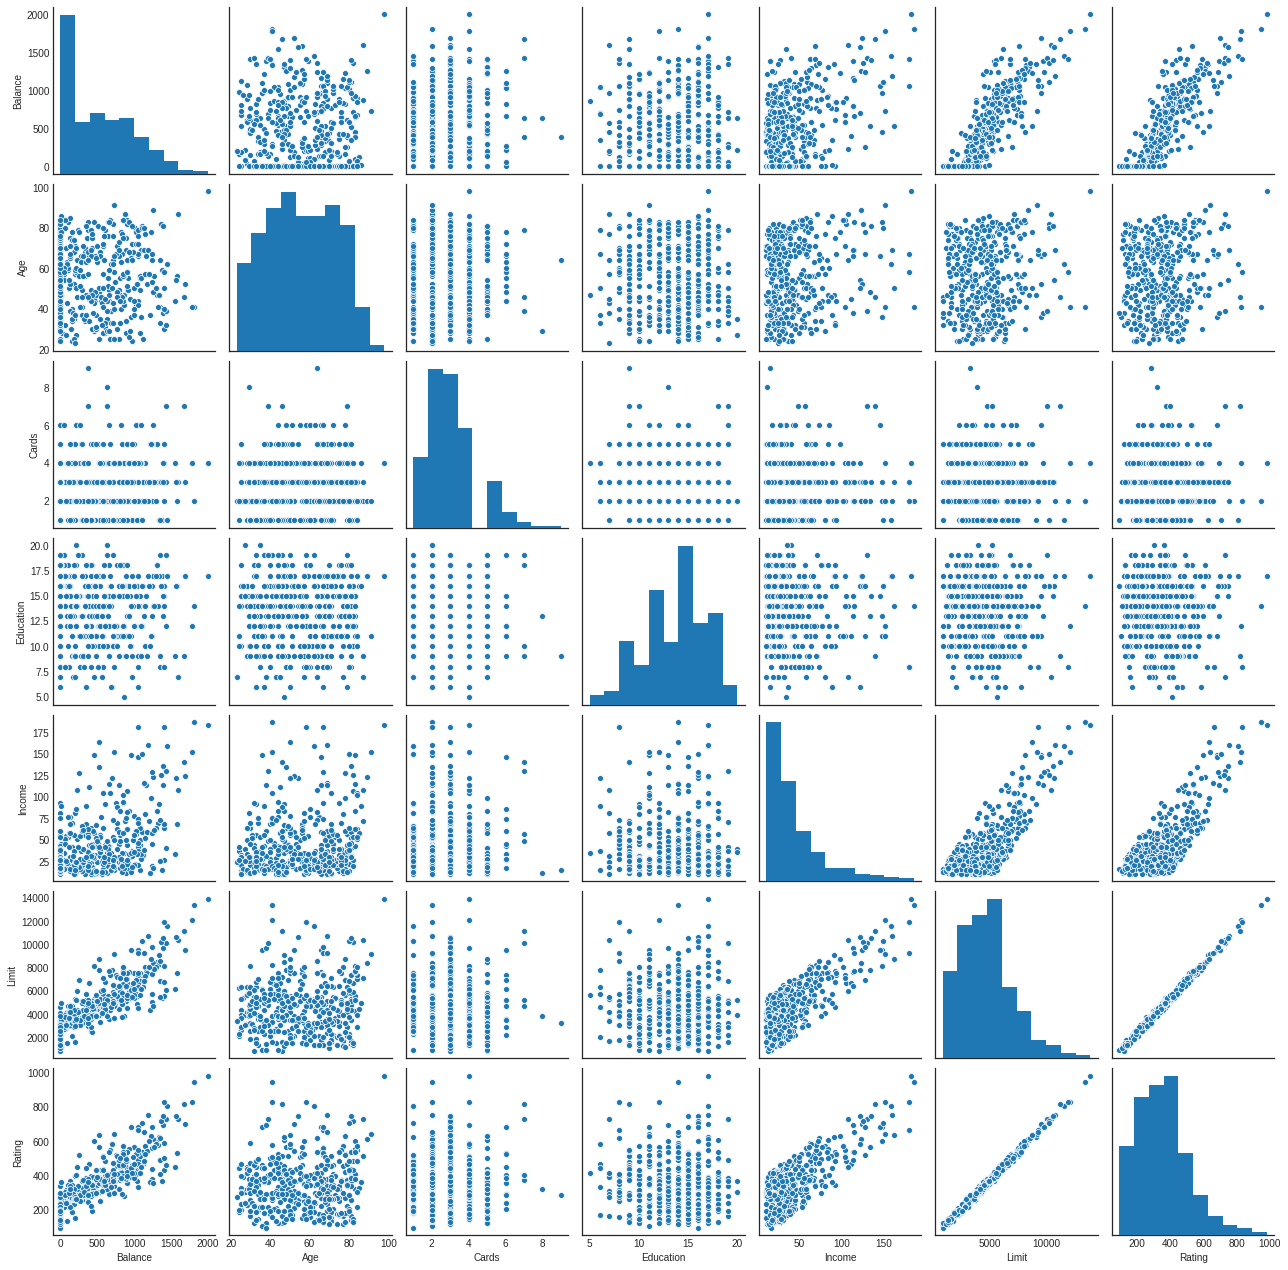

In [196]:
sns.pairplot(credit[["Balance", "Age", "Cards", "Education", "Income", "Limit", "Rating"]])

저 범주형 얘들은 이렇다할 게 안 보이는데 age랑 balance 사이의 값만 빼면 나머진 어느 정도 선형적 관계가 있어 보임.

In [197]:
est = smf.ols("Balance ~ Gender", credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


In [198]:
est = smf.ols("Balance ~ Ethnicity", credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


이야, 어떻게 이렇게 p-value가 클 수가 있냐, 강의 받을 때도 못 본 숫자인 거 같은데.

종합적인 모델 평가가 보고 싶어지는 값은 또 처음이야.

In [199]:
est = smf.ols("sales ~ TV + radio + TV*radio", advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [200]:
est1 = smf.ols("Balance ~ Income + Student2", credit).fit()
regr1 = est1.params
est2 = smf.ols("Balance ~ Income + Student2 + Income*Student2", credit).fit()
regr2 = est2.params

print("Regression 1 - without interaction term")
print(regr1)
print("\nRegression 1 - with interaction term")
print(regr2)

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 1 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


개인적인 감상으로는 확실히 예측변수가 많아지면 설명력이 높아진다라는 의미를 알 것만 같음, 물론 표준화된 값이 아니라서 어느 덧셈에 더 가중치를 줘야 하는지는 판단할 수 없지만.

In [0]:
income = np.linspace(0, 150)

student1 = np.linspace(regr1["Intercept"] + regr1["Student2"],
                       regr1["Intercept"] + regr1["Student2"] + 150*regr1["Income"])
non_student1 = np.linspace(regr1["Intercept"], regr1["Intercept"] + 150*regr1["Income"])

student2 = np.linspace(regr2["Intercept"] + regr2["Student2"],
                       regr2["Intercept"] + regr2["Student2"] + 150*(regr2["Income"] + regr2["Income:Student2"]))
non_student2 = np.linspace(regr2["Intercept"], regr2["Intercept"] + 150*regr2["Income"])

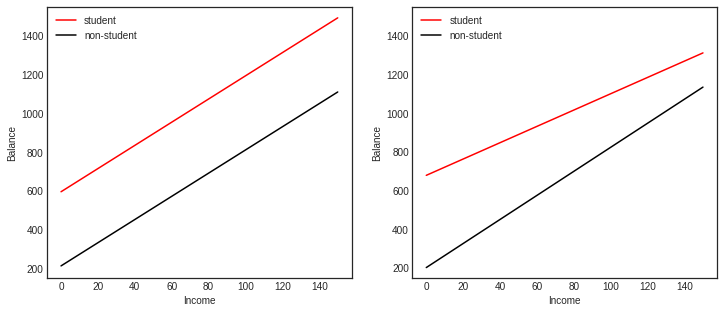

In [202]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income ,non_student2, 'k')

for ax in fig.axes:
  ax.legend(["student", 'non-student'], loc = 2)
  ax.set_xlabel("Income")
  ax.set_ylabel("Balance")
  ax.set_ylim(ymax = 1550)

이거 원래는 상호작용 효과의 유무를 보고자 하는 질적변수의 유무를 통해 특정 예측변수와 반응변수의 선이 많이 변하는지 겹치게 되는지를 보고 상호작용 효과 term의 변수 추가, 삭제를 가리는 거 아니었나.

(40.0, 240.0)

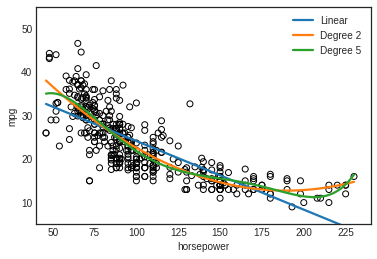

In [203]:
plt.scatter(auto.horsepower, auto.mpg, facecolors = "None", edgecolors = 'k')
sns.regplot(auto.horsepower, auto.mpg, ci = None, label = "Linear", scatter = False)
sns.regplot(auto.horsepower, auto.mpg, ci = None, label = "Degree 2", order = 2, scatter = False)
sns.regplot(auto.horsepower, auto.mpg, ci = None, label = "Degree 5", order = 5, scatter = False)
plt.legend()
plt.ylim(5, 55)
plt.xlim(40, 240)

regplot을 통해 회귀선을 유추해보는 거구나. 근데 다 별론데. 차라리 변수변환하는 게 낫겠다.

horsepower에 대한 선형 관계는 버리는구만.

In [204]:
auto["horsepower2"] = auto.horsepower**2
auto.head(3)

   Unnamed: 0   mpg  cylinders  ...  origin                       name  horsepower2
0           1  18.0          8  ...       1  chevrolet chevelle malibu        16900
1           2  15.0          8  ...       1          buick skylark 320        27225
2           3  18.0          8  ...       1         plymouth satellite        22500

[3 rows x 11 columns]

In [205]:
est = smf.ols("mpg ~ horsepower + horsepower2", auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


In [0]:
regr = skl_lm.LinearRegression()
X = auto.horsepower.values.reshape(-1, 1)
y = auto.mpg
regr.fit(X, y)

auto["pred1"] = regr.predict(X)
auto["resid1"] = auto.mpg - auto.pred1

In [0]:
X2 = auto[["horsepower", "horsepower2"]]
regr.fit(X2, y)

auto["pred2"] = regr.predict(X2)
auto["resid2"] = auto.mpg - auto.pred2

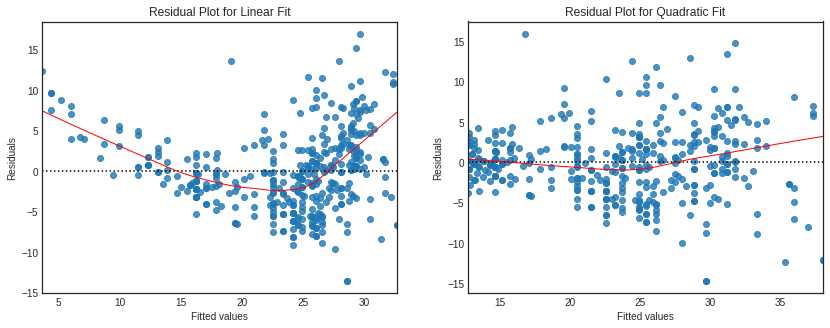

In [208]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

sns.regplot(auto.pred1, auto.resid1, lowess = True, ax = ax1, line_kws = {"color": 'r', "lw": 1})
ax1.hlines(0, xmin = ax1.xaxis.get_data_interval()[0], xmax = ax1.xaxis.get_data_interval()[1], linestyles = "dotted")
ax1.set_title("Residual Plot for Linear Fit")

sns.regplot(auto.pred2, auto.resid2, lowess = True, line_kws = {"color": 'r', "lw": 1}, ax = ax2)
ax2.hlines(0, xmin = ax2.xaxis.get_data_interval()[0], xmax = ax2.xaxis.get_data_interval()[1], linestyles = "dotted")
ax2.set_title("Residual Plot for Quadratic Fit")

for ax in fig.axes:
  ax.set_xlabel("Fitted values")
  ax.set_ylabel("Residuals")

선형으로 가정하니 선형성을 위반하고 비선형성으로 가정하니 선형에 가깝게 나오는 아이러니. 물론 후자는 반응변수와 변수 간의 사이를 비선형으로 판단했을 뿐이니 잔차의 선형성 유무는 관심사가 아니지 않나.

그리고 이분산이 의심되는 건 똑같다.

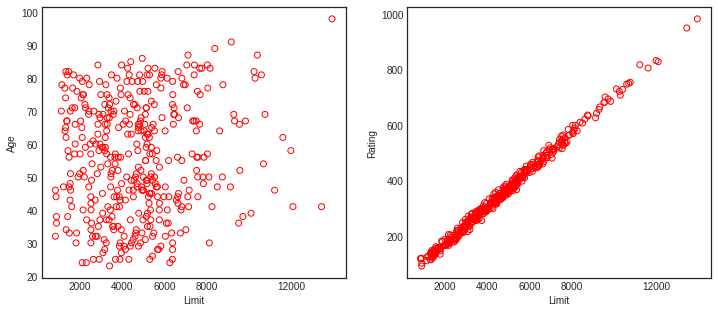

In [209]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.scatter(credit.Limit, credit.Age, facecolor = "None", edgecolor = 'r')
ax1.set_ylabel("Age")

ax2.scatter(credit.Limit, credit.Rating, facecolor = "None", edgecolor = 'r')
ax2.set_ylabel("Rating")

for ax in fig.axes:
  ax.set_xlabel("Limit")
  ax.set_xticks([2000, 4000, 6000, 8000, 12000])

아무래도 outlier를 잡을 max 값을 12000으로 잡았던 것 같고, rating은 limit랑 너무 선형인데

In [210]:
y = credit.Balance

X = credit[["Age", "Limit"]]
regr1 = skl_lm.LinearRegression()
regr1.fit(scale(X, with_std = False), y)
print("Age / Limit\n", regr1.intercept_)
print(regr1.coef_)

Age / Limit
 520.0150000000001
[-2.29148553  0.17336497]


In [211]:
X2 = credit[["Rating", "Limit"]]
regr2 = skl_lm.LinearRegression()
regr2.fit(scale(X2, with_std = False), y)
print("Rating / Limit\n", regr2.intercept_)
print(regr2.coef_)

Rating / Limit
 520.015
[2.20167217 0.02451438]


달라지는 변수의 회귀선에 대한 영향이 미미한 것은 아니지만 (단위의 영향을 무시할 수 없으므로 비교할 수 없어) 제쳐놓고, Limit 변수의 영향은 Rating이 되면서 줄어들었다. 이는 Rating 변수와 Limit 사이의 강한 상관관계로 인한 현상으로 보인다.

In [0]:
B_Age = np.linspace(regr1.coef_[0] - 3, regr1.coef_[0] + 3, 100)
B_Limit = np.linspace(regr1.coef_[1] - 0.02, regr1.coef_[1] + 0.02, 100)
B_Rating = np.linspace(regr2.coef_[0] - 3, regr2.coef_[0] + 3, 100)
B_Limit2 = np.linspace(regr2.coef_[1] - 0.2, regr2.coef_[1] + 0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age)
X2, Y2 = np.meshgrid(B_Limit2, B_Rating)
Z1 = np.zeros((B_Age.size, B_Limit.size))
Z2 = np.zeros((B_Rating.size, B_Limit2.size))

Limit_scaled = scale(credit.Limit, with_std = False)
Age_scaled = scale(credit.Age, with_std = False)
Rating_scaled = scale(credit.Rating, with_std = False)

In [0]:
for (i,j), v in np.ndenumerate(Z1):
  Z1[i,j] = ((y - (regr1.intercept_ + X1[i,j]*Limit_scaled + Y1[i,j]*Age_scaled))**2).sum()/1000000

for (i,j), v in np.ndenumerate(Z2):
  Z2[i,j] = ((y - (regr2.intercept_ + X2[i,j]*Limit_scaled + Y2[i,j]*Rating_scaled))**2).sum()/1000000

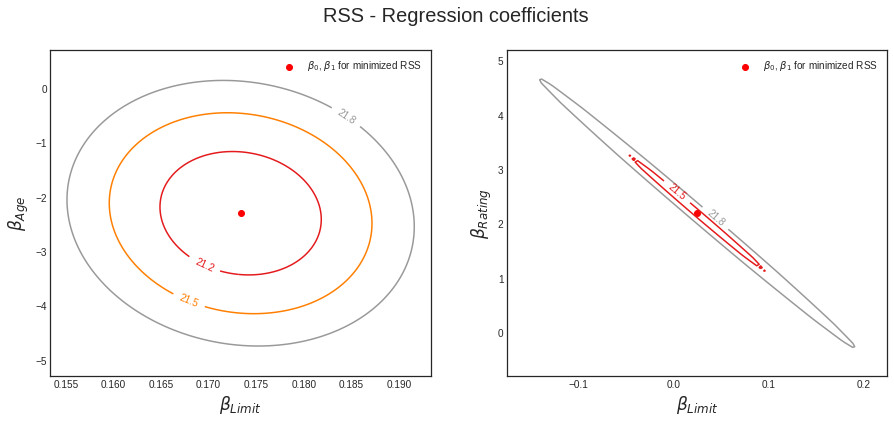

In [214]:
fig = plt.figure(figsize=(15,6))
fig.suptitle("RSS - Regression coefficients", fontsize = 20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r"$\beta_0$, $\beta_1$ for minimized RSS"

CS = ax1.contour(X1, Y1, Z1, cmap = plt.cm.Set1, levels = [21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c = 'r', label = min_RSS)
ax1.clabel(CS, inline = True, fontsize = 10, fmt = "%1.1f")
ax1.set_ylabel(r"$\beta_{Age}$", fontsize = 17)

CS = ax2.contour(X2, Y2, Z2, cmap = plt.cm.Set1, levels = [21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c = 'r', label = min_RSS)
ax2.clabel(CS, inline = True, fontsize = 10, fmt = "%1.1f")
ax2.set_ylabel(r"$\beta_{Rating}$", fontsize = 17)
ax2.set_xticks(np.arange(-0.1, 0.2, 0.1))

for ax in fig.axes:
  ax.set_xlabel(r"$\beta_{Limit}$", fontsize = 17)
  ax.legend()

정말 아주 서로 관련이 없다고, 강한 상관관계가 있다고 미친듯이 보여주는 그림.

In [215]:
est_Age = smf.ols("Age ~ Rating + Limit", credit).fit()
est_Rating = smf.ols("Rating ~ Age + Limit", credit).fit()
est_Limit = smf.ols("Limit ~ Age + Rating", credit).fit()

print(1 / (1 - est_Age.rsquared), " // ", 1 / (1 - est_Rating.rsquared), " // ", 1 / (1 - est_Limit.rsquared))

1.0113846860681328  //  160.66830095856935  //  160.59287978597942


확실히 Rating이랑 Limit 변수는 다중공산성을 유발. 굳이 같이 쓰고 싶다면 주성분 회귀쪽으로 전향.